## Description
This is to demonstrate the use of neural network for binary classification.
The data is a set of IMDB movie reviews. Each review contains specific words,
based on which the neural network classifies any review as positive or negative.
In other words, the network performs sentiment analysis on the reviews data.

### 1. Setup

In [60]:
# import standard libs and setup the keras backend
import os

# import local libs
from classifiers import System
from classifiers.text import Vectorizer, Splitter

# import third-party libs
import keras
from keras.datasets import imdb
from keras import layers
from keras import models
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

# plots will be printed in the notebook
%matplotlib inline

System.print_info()

System Information:
-------------------
Keras Backend: tensorflow
Tensorflow log level: 1
CPUs Available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
-------------------


### 2. Data preparation

In [61]:
print('Preparing data...', end='')

# load data - 50.000 movie reviews, loaded will be the most frequent 10.000 words per text
n_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=n_words)

# vectorize the training and testing data
# before being loaded into the network
vectorizer = Vectorizer(dtype=np.uint8) # using an int data type instead of float to prevent precision loss
x_train_vec = vectorizer.vectorize_text(train_data, n_words)
x_test_vec = vectorizer.vectorize_text(test_data, n_words)

# also vectorize data labels
y_train_vec = vectorizer.vectorize_labels(train_labels)
y_test_vec = vectorizer.vectorize_labels(test_labels)

# split the original training data into two sets so
# that first 25.000 reviews will be used for training
# and the last 10.000 reviews for validation of the model
splitter = Splitter(split_idx = 10000)
x_train, x_valid = splitter.split_train_validation(x_train_vec)
y_train, y_valid = splitter.split_train_validation(y_train_vec)

print('done.')

Preparing data...done.


In [83]:
# model hyperparameters
n_epochs = 20
batch_size = 512
l2_reg = 0.001 # every coefficient w in the W matrix of a layer adds 0.001 * w to the total loss
learn_rate = 0.001

### 3. Model compilation, training and evalaulation - test 01 (reference model)

In [84]:
# initialize the network model
from keras import regularizers

model_01 =  models.Sequential()
model_01.add(layers.Input(shape=(n_words,)))

model_01.add(layers.Dense(
    16, # 16 units (dimensions) in the first representation space
    kernel_regularizer=regularizers.l2(l2_reg),
    activation='relu')
)   

model_01.add(layers.Dense(
    16, # 16 units (dimensions) in the second representation space
    kernel_regularizer=regularizers.l2(l2_reg),
    activation='relu')
)   

model_01.add(layers.Dense(
    1, # single unit for binary classification
    activation='sigmoid') # sigmoid for positive/negative classification
) 

# compile the model
model_01.compile(
    optimizer=RMSprop(learning_rate=learn_rate),
    loss='binary_crossentropy', # final classification is binary
    metrics=['accuracy']
)

# train the model with the data and labels
history_01 = model_01.fit(
    x_train,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(
        x_valid,
        y_valid
    )
).history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7016 - loss: 0.6435 - val_accuracy: 0.8665 - val_loss: 0.4447
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8910 - loss: 0.3913 - val_accuracy: 0.8823 - val_loss: 0.3629
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9158 - loss: 0.3035 - val_accuracy: 0.8885 - val_loss: 0.3353
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9335 - loss: 0.2586 - val_accuracy: 0.8847 - val_loss: 0.3388
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.2287 - val_accuracy: 0.8837 - val_loss: 0.3369
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9547 - loss: 0.2065 - val_accuracy: 0.8863 - val_loss: 0.3310
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9607 - loss: 0.1907 - val_accuracy: 0.8855 - val_loss: 0.3383
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9624 - loss: 0.1822 - val_accuracy: 0.8841 - val_loss

### 3. Model compilation, training and evalaulation - test 02 (smaller model)

In [85]:
# initialize the network model
model_02 =  models.Sequential()
model_02.add(layers.Input(shape=(n_words,)))
model_02.add(layers.Dense(4, activation='relu'))   # 16 units (dimensions) in the first representation space
model_02.add(layers.Dense(4, activation='relu'))   # 16 units (dimensions) in the second representation space
model_02.add(layers.Dense(1, activation='sigmoid')) # sigmoid for positive/negative classification

# compile the model
model_02.compile(
    optimizer=RMSprop(learning_rate=learn_rate),
    loss='binary_crossentropy', # final classification is binary
    metrics=['accuracy']
)

# train the model with the data and labels
history_02 = model_02.fit(
    x_train,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(
        x_valid,
        y_valid
    )
).history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6148 - loss: 0.6662 - val_accuracy: 0.7308 - val_loss: 0.5927
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7613 - loss: 0.5717 - val_accuracy: 0.7870 - val_loss: 0.5431
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8231 - loss: 0.5204 - val_accuracy: 0.8168 - val_loss: 0.5120
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8618 - loss: 0.4784 - val_accuracy: 0.8294 - val_loss: 0.4927
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8872 - loss: 0.4533 - val_accuracy: 0.8743 - val_loss: 0.4753
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9098 - loss: 0.4242 - val_accuracy: 0.8526 - val_loss: 0.4658
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.4107 - val_accuracy: 0.8594 - val_loss: 0.4582
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9260 - loss: 0.3907 - val_accuracy: 0.8648 - val_loss

### 3. Model compilation, training and evalaulation - test 03 (larger model)

In [97]:
# initialize the network model
model_03 = models.Sequential()
model_03.add(layers.Input(shape=(n_words,)))
model_03.add(layers.Dense(64, activation='relu'))   # 16 units (dimensions) in the first representation space
model_03.add(layers.Dense(128, activation='relu'))   # 16 units (dimensions) in the second representation space
model_03.add(layers.Dense(1, activation='sigmoid')) # sigmoid for positive/negative classification

# compile the model
model_03.compile(
    optimizer=RMSprop(learning_rate=learn_rate),
    loss='binary_crossentropy', # final classification is binary
    metrics=['accuracy']
)

# train the model with the data and labels
history_03 = model_03.fit(
    x_train,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(
        x_valid,
        y_valid
    )
).history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.6612 - loss: 0.6061 - val_accuracy: 0.8403 - val_loss: 0.3884
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8747 - loss: 0.3193 - val_accuracy: 0.8504 - val_loss: 0.3514
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9116 - loss: 0.2328 - val_accuracy: 0.8845 - val_loss: 0.2904
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9342 - loss: 0.1770 - val_accuracy: 0.8857 - val_loss: 0.2846
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9447 - loss: 0.1535 - val_accuracy: 0.8860 - val_loss: 0.2934
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.1045 - val_accuracy: 0.8757 - val_loss: 0.3297
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0826 - val_accuracy: 0.8830 - val_loss: 0.3322
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.0733 - val_accuracy: 0.8775 - val_los

### 4. Comparison of the previous models in terms of validation loss

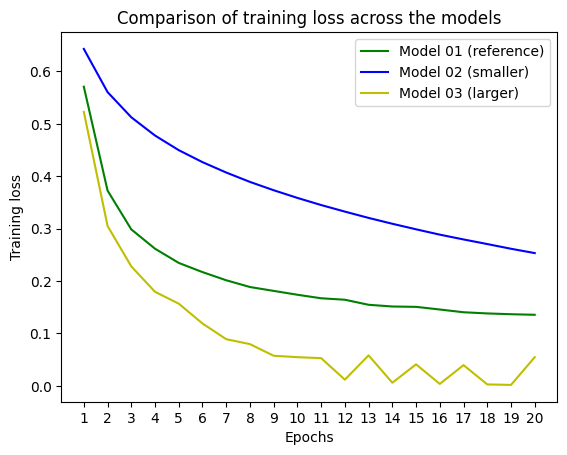

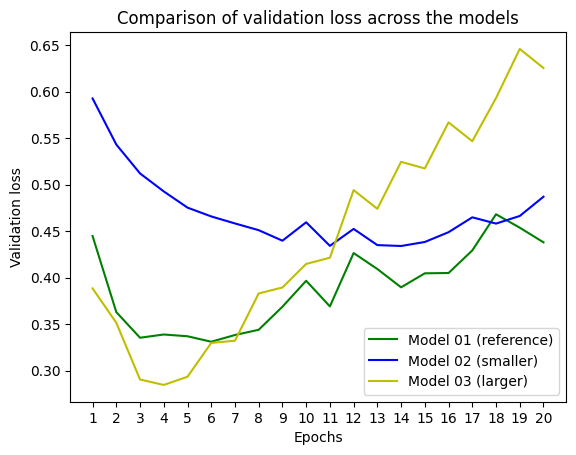

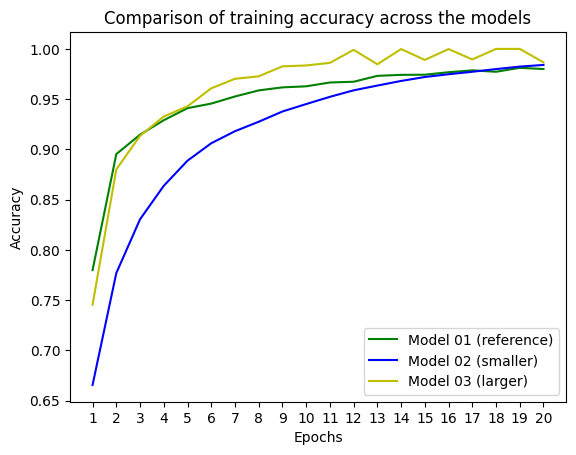

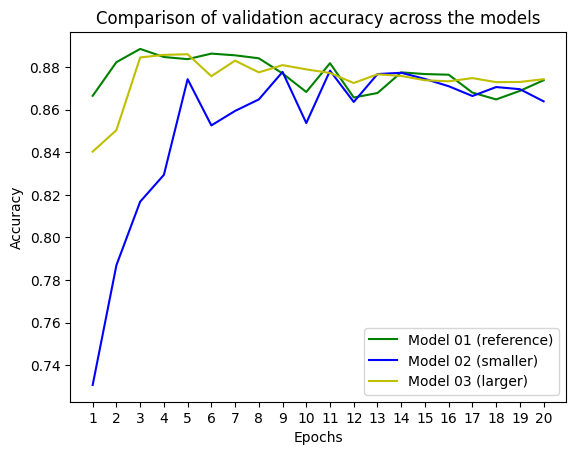

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8597 - loss: 0.4686
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8503 - loss: 0.5098
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.8624 - loss: 0.6769
[0.45898038148880005, 0.8636000156402588]
[0.4972049593925476, 0.8561599850654602]
[0.6761848330497742, 0.865559995174408]


In [98]:
training_loss_01 = history_01['loss']
validation_loss_01 = history_01['val_loss']
training_accuracy_01 = history_01['accuracy']
validation_accuracy_01 = history_01['val_accuracy']

training_loss_02 = history_02['loss']
validation_loss_02 = history_02['val_loss']
training_accuracy_02 = history_02['accuracy']
validation_accuracy_02 = history_02['val_accuracy']

training_loss_03 = history_03['loss']
validation_loss_03 = history_03['val_loss']
training_accuracy_03 = history_03['accuracy']
validation_accuracy_03 = history_03['val_accuracy']

epochs=range(1, n_epochs + 1)

model_01_desc = 'Model 01 (reference)'
model_02_desc = 'Model 02 (smaller)'
model_03_desc = 'Model 03 (larger)'

# plot training loss
plt.plot(epochs, training_loss_01, 'g', label=model_01_desc)
plt.plot(epochs, training_loss_02, 'b', label=model_02_desc)
plt.plot(epochs, training_loss_03, 'y', label=model_03_desc)
plt.title('Comparison of training loss across the models')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.xticks(epochs)
plt.legend()
plt.show()


# plot validation loss
plt.plot(epochs, validation_loss_01, 'g', label=model_01_desc)
plt.plot(epochs, validation_loss_02, 'b', label=model_02_desc)
plt.plot(epochs, validation_loss_03, 'y', label=model_03_desc)
plt.title('Comparison of validation loss across the models')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.xticks(epochs)
plt.legend()
plt.show()


# plot training accuracy
plt.plot(epochs, training_accuracy_01, 'g', label=model_01_desc)
plt.plot(epochs, training_accuracy_02, 'b', label=model_02_desc)
plt.plot(epochs, training_accuracy_03, 'y', label=model_03_desc)
plt.title('Comparison of training accuracy across the models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

# plot validation accuracy
plt.plot(epochs, validation_accuracy_01, 'g', label=model_01_desc)
plt.plot(epochs, validation_accuracy_02, 'b', label=model_02_desc)
plt.plot(epochs, validation_accuracy_03, 'y', label=model_03_desc)
plt.title('Comparison of validation accuracy across the models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

eval_01 = model_01.evaluate(x_test_vec, y_test_vec)
eval_02 = model_02.evaluate(x_test_vec, y_test_vec)
eval_03 = model_03.evaluate(x_test_vec, y_test_vec)

print(eval_01)
print(eval_02)
print(eval_03)

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Hyperparameters
vocab_size = 10000     # Size of the vocabulary
embedding_dim = 128     # Dimension of word embeddings
max_length = 200       # Maximum number of words in each review
lstm_units = 64       # Number of LSTM units
dropout_rate = 0.3     # Dropout rate

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# Define model architecture
model = Sequential()

# Maps each word in a review to a fixed-length dense vector.
model.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim
))

# LSTM to process data in both forward and backward directions, 
# providing context from both sides.
model.add(Bidirectional(LSTM(lstm_units, return_sequences=False)))

# apply drouput after the LSTM layer to prevent overfitting.
model.add(Dropout(dropout_rate))

# Learns higher-level features after the LSTM output.
model.add(Dense(64, activation='relu'))

# apply drouput after after Dense
# layers to prevent overfitting.
model.add(Dropout(dropout_rate))

# A single neuron with a sigmoid activation
# for binary classification (positive/negative).
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6086 - loss: 0.6396 - val_accuracy: 0.8280 - val_loss: 0.4098
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8741 - loss: 0.3189 - val_accuracy: 0.8744 - val_loss: 0.3116
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9337 - loss: 0.1877 - val_accuracy: 0.8756 - val_loss: 0.3423
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9612 - loss: 0.1202 - val_accuracy: 0.8600 - val_loss: 0.3906
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9728 - loss: 0.0812 - val_accuracy: 0.8446 - val_loss: 0.4150
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8385 - loss: 0.4321
Test Accuracy: 0.83


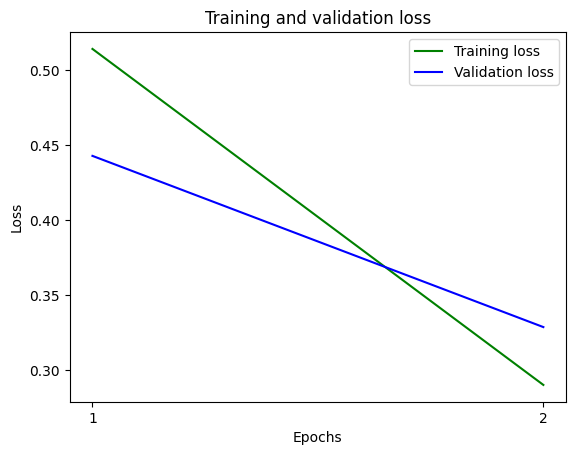

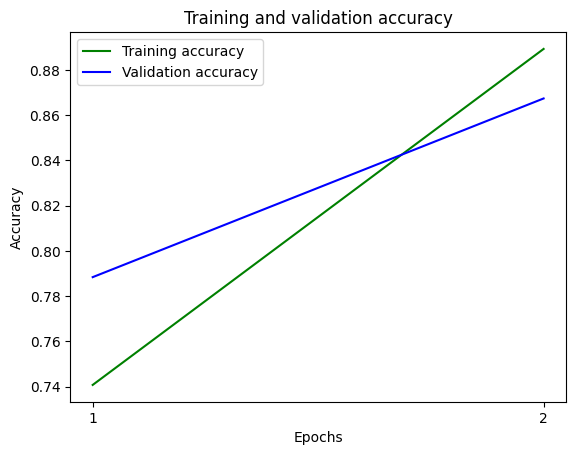

In [13]:
# evaluate the model
import matplotlib.pyplot as plt

training_loss = history.history['loss']
training_val_loss = history.history['val_loss']
epochs=range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, training_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

training_accuracy = history.history['accuracy']
training_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, training_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, training_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()